In [1]:
import torch,math
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader

import torch.nn.functional as F
import torch.nn as NN
torch.__version__

'1.4.0'

# Fashion MNIST进行分类 
## Fashion MNIST 介绍
Fashion MNIST数据集 是kaggle上提供的一个图像分类入门级的数据集，其中包含10个类别的70000个灰度图像。如图所示，这些图片显示的是每件衣服的低分辨率(28×28像素)

数据集的下载和介绍：[地址](https://www.kaggle.com/zalando-research/fashionmnist/)


Fashion MNIST的目标是作为经典MNIST数据的替换——通常被用作计算机视觉机器学习程序的“Hello, World”。

MNIST数据集包含手写数字(0-9等)的图像，格式与我们将在这里使用的衣服相同，MNIST只有手写的0-1数据的复杂度不高，所以他只能用来做“Hello, World”

而Fashion MNIST 的由于使用的是衣服的数据，比数字要复杂的多，并且图片的内容也会更加多样性，所以它是一个比常规MNIST稍微更具挑战性的问题。

Fashion MNIST这个数据集相对较小，用于验证算法是否按预期工作。它们是测试和调试代码的好起点。

## 数据集介绍

### 分类
```
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 
```
### 格式

fashion-mnist_test.csv

fashion-mnist_train.csv

存储的训练的数据和测试的数据，格式如下：

label是分类的标签
pixel1-pixel784是每一个像素代表的值 因为是灰度图像，所以是一个0-255之间的数值。

为什么是784个像素？ 28 * 28 = 784

### 数据提交

Fashion MNIST不需要我们进行数据的提交，数据集中已经帮助我们将 训练集和测试集分好了，我们只需要载入、训练、查看即可，所以Fashion MNIST 是一个非常好的入门级别的数据集


In [2]:
#指定数据目录
DATA_PATH=Path('./data/')

In [3]:
train = pd.read_csv(DATA_PATH / "fashion-mnist_train.csv");
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv(DATA_PATH / "fashion-mnist_test.csv");
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [5]:
train.max()

label         9
pixel1       16
pixel2       36
pixel3      226
pixel4      164
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 785, dtype: int64

ubyte文件标识了数据的格式

其中idx3的数字表示数据维度。也就是图像为3维，
idx1 标签维1维。

具体格式详解：http://yann.lecun.com/exdb/mnist/

In [6]:
import struct
from PIL import Image 

with open(DATA_PATH / "train-images-idx3-ubyte", 'rb') as file_object:
    header_data=struct.unpack(">4I",file_object.read(16))
    print(header_data)

(2051, 60000, 28, 28)


In [7]:
with open(DATA_PATH / "train-labels-idx1-ubyte", 'rb') as file_object:
    header_data=struct.unpack(">2I",file_object.read(8))
    print(header_data)

(2049, 60000)


(28, 28)


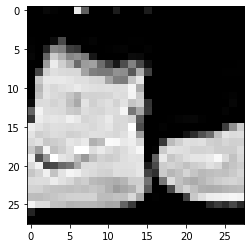

In [8]:
with open(DATA_PATH / "train-images-idx3-ubyte", 'rb') as file_object:
    raw_img = file_object.read(28*28)
    img = struct.unpack(">784B",raw_img)
    image = np.asarray(img)
    image = image.reshape((28,28))
    print(image.shape)
    plt.imshow(image,cmap = plt.cm.gray)
    plt.show()

In [9]:
with open(DATA_PATH / "train-labels-idx1-ubyte", 'rb') as file_object:
    raw_img = file_object.read(1)
    label = struct.unpack(">B",raw_img)
    print(label)

(0,)


这里好像有点错误，显示的错位了，但是我的确是按照格式进行处理的。这种格式处理起来比较复杂，并且数据集中的csv直接给出了每个像素的值，所以这里我们可以直接使用csv格式的数据。

## 数据加载

为了使用pytorch的dataloader进行数据的加载，需要先创建一个自定义的dataset

In [10]:
class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        data = pd.read_csv(csv_file)
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28).astype(float)
        self.Y = np.array(data.iloc[:, 0]);
        del data;  #结束data对数据的引用,节省空间
        self.len=len(self.X)

    def __len__(self):
        #return len(self.X)
        return self.len
        
    
    def __getitem__(self, idx):
        item = self.X[idx]
        label = self.Y[idx]
        return (item, label)

对于自定义的数据集，只需要实现三个函数：

`__init__`： 初始化函数主要用于数据的加载，这里直接使用pandas将数据读取为dataframe，然后将其转成numpy数组来进行索引

`__len__`： 返回数据集的总数，pytorch里面的datalorder需要知道数据集的总数的

`__getitem__`：会返回单张图片，它包含一个index，返回值为样本及其标签。

创建训练和测试集

In [11]:
train_dataset = FashionMNISTDataset(csv_file=DATA_PATH / "fashion-mnist_train.csv")
test_dataset = FashionMNISTDataset(csv_file=DATA_PATH / "fashion-mnist_test.csv")

在使用Pytorch的DataLoader读取数据之前，需要指定一个batch size 这也是一个超参数，涉及到内存的使用量，如果出现OOM的错误则要减小这个数值，一般这个数值都为2的幂或者2的倍数。

In [12]:
#因为是常量，所以大写，需要说明的是，这些常量建议都使用完整的英文单词，减少歧义
#BATCH_SIZE=256 # 这个batch 可以在M250的笔记本显卡中进行训练，不会oom
BATCH_SIZE=4096

我们接着使用dataloader模块来使用这些数据

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True) # shuffle 标识要打乱顺序

In [14]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=False) # shuffle 标识要打乱顺序，测试集不需要打乱

查看一下数据

In [15]:
a=iter(train_loader)
data=next(a)
img=data[0][0].reshape(28,28)
data[0][0].shape,img.shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

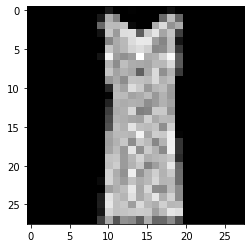

In [16]:
plt.imshow(img,cmap = plt.cm.gray)
plt.show()

这回看着就没问题了，是一个完整的图了，所以我们还是用csv吧

## 创建网络

三层的简单的CNN网络

In [17]:
class CNN(NN.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = NN.Sequential(   
            NN.Conv2d(1, 32, kernel_size=5, padding=2),
            NN.BatchNorm2d(32), 
            NN.ReLU()) #32, 28, 28
        self.pool1=NN.MaxPool2d(2) #16, 14, 14
        self.layer2 = NN.Sequential(
            NN.Conv2d(32, 64, kernel_size=3),
            NN.BatchNorm2d(64),
            NN.ReLU())#64, 12, 12
        self.layer3 = NN.Sequential(
            NN.Conv2d(64, 128, kernel_size=3),
            NN.BatchNorm2d(128),
            NN.ReLU()) #128, 10, 10
        self.pool2=NN.MaxPool2d(2)  #128, 5, 5
        self.fc = NN.Linear(5*5*128, 320)
        self.fc2 = NN.Linear(320, 10)
    def forward(self, x):
        out = self.layer1(x)
        #print(out.shape)
        out=self.pool1(out)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out=self.layer3(out)
        #print(out.shape)
        out=self.pool2(out)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        #print(out.shape)
        out = self.fc(out)
        out = self.fc2(out)
        return out

以上代码看起来很简单。这里面都是包含的数学的含义。我们只讲pytorch相关的：在函数里使用torch.nn提供的模块来定义各个层，在每个卷积层后使用了批次的归一化和RELU激活并且在每一个操作分组后面进行了pooling的操作（减少信息量，避免过拟合），后我们使用了全连接层来输出10个类别。

view函数用来改变输出值矩阵的形状来匹配最后一层的维度。

In [18]:
cnn = CNN();
#可以通过以下方式验证，没报错说明没问题，
cnn(torch.rand(1,1,28,28))

tensor([[ 0.2776,  0.2963,  0.4470,  0.2642, -0.3192,  0.3181, -0.4381,  0.2687,
          0.3600, -0.2100]], grad_fn=<AddmmBackward>)

In [19]:
#打印下网络，做最后的确认
print(cnn)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3200, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=10, bias=True)
)


从定义模型开始就要指定模型计算的位置，CPU还是GPU，所以需要加另外一个参数

In [20]:
DEVICE=torch.device("cpu")
if torch.cuda.is_available():
        DEVICE=torch.device("cuda")
print(DEVICE)

cuda


In [21]:
#先把网络放到gpu上
cnn=cnn.to(DEVICE)

## 损失函数
多分类因为使用Softmax回归将神经网络前向传播得到的结果变成概率分布 所以使用交叉熵损失。
在pytorch中 
NN.CrossEntropyLoss 是将 `nn.LogSoftmax()` 和 `nn.NLLLoss()`进行了整合，[CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#crossentropyloss) ,我们也可以分开来写使用两步计算，这里为了方便直接一步到位


In [22]:
#损失函数也需要放到GPU中
criterion = NN.CrossEntropyLoss().to(DEVICE)

## 优化器
Adam 优化器：简单，暴力，最主要还是懒

In [23]:
#另外一个超参数，学习率
LEARNING_RATE=0.01

In [24]:
#优化器不需要放GPU
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)

## 开始训练

In [25]:
#另外一个超参数，指定训练批次
TOTAL_EPOCHS=100

In [26]:
%%time
#记录损失函数
losses = [];
for epoch in range(TOTAL_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.float().to(DEVICE)
        labels = labels.to(DEVICE)
        #清零
        optimizer.zero_grad()
        outputs = cnn(images)
        #计算损失函数
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().data.item());
        if (i+1) % 10 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f'%(epoch+1, TOTAL_EPOCHS, i+1, len(train_dataset)//BATCH_SIZE, loss.data.item()))
            

Epoch : 1/100, Iter : 10/14,  Loss: 14.7876
Epoch : 2/100, Iter : 10/14,  Loss: 2.5606
Epoch : 3/100, Iter : 10/14,  Loss: 1.0827
Epoch : 4/100, Iter : 10/14,  Loss: 0.6936
Epoch : 5/100, Iter : 10/14,  Loss: 0.5400
Epoch : 6/100, Iter : 10/14,  Loss: 0.5084
Epoch : 7/100, Iter : 10/14,  Loss: 0.4597
Epoch : 8/100, Iter : 10/14,  Loss: 0.4653
Epoch : 9/100, Iter : 10/14,  Loss: 0.4461
Epoch : 10/100, Iter : 10/14,  Loss: 0.4209
Epoch : 11/100, Iter : 10/14,  Loss: 0.3885
Epoch : 12/100, Iter : 10/14,  Loss: 0.3989
Epoch : 13/100, Iter : 10/14,  Loss: 0.3633
Epoch : 14/100, Iter : 10/14,  Loss: 0.3862
Epoch : 15/100, Iter : 10/14,  Loss: 0.3572
Epoch : 16/100, Iter : 10/14,  Loss: 0.3484
Epoch : 17/100, Iter : 10/14,  Loss: 0.3174
Epoch : 18/100, Iter : 10/14,  Loss: 0.3436
Epoch : 19/100, Iter : 10/14,  Loss: 0.3193
Epoch : 20/100, Iter : 10/14,  Loss: 0.3268
Epoch : 21/100, Iter : 10/14,  Loss: 0.3382
Epoch : 22/100, Iter : 10/14,  Loss: 0.3132
Epoch : 23/100, Iter : 10/14,  Loss: 0.3

## 训练后操作
### 可视化损失函数

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


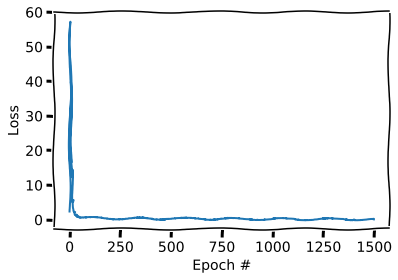

In [27]:
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses);
plt.show();

### 保存模型 

In [28]:
torch.save(cnn.state_dict(), "fm-cnn3.pth")
# 加载用这个
#cnn.load_state_dict(torch.load("fm-cnn3.pth"))

## 模型评估

模型评估就是使用测试集对模型进行的评估，应该是添加到训练中进行了，这里为了方便说明直接在训练完成后评估了

In [29]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('准确率: %.4f %%' % (100 * correct / total))

准确率: 91.0000 %


模型评估的步骤如下：
1. 将网络的模式改为eval。
2. 将图片输入到网络中得到输出。
3. 通过取出one-hot输出的最大值来得到输出的 标签。
4. 统计正确的预测值。

## 进一步优化

In [30]:
%%time
#修改学习率和批次
cnn.train()
LEARNING_RATE=LEARNING_RATE / 10
TOTAL_EPOCHS=80
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)
losses = [];
for epoch in range(TOTAL_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.float().to(DEVICE)
        labels = labels.to(DEVICE)
        #清零
        optimizer.zero_grad()
        outputs = cnn(images)
        #计算损失函数
        #损失函数直接放到CPU中，因为还有其他的计算
        loss = criterion(outputs, labels).cpu()
        loss.backward()
        optimizer.step()
        losses.append(loss.data.item());
        if (i+1) % 10 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f'%(epoch+1, TOTAL_EPOCHS, i+1, len(train_dataset)//BATCH_SIZE, loss.data.item()))
            

Epoch : 1/80, Iter : 10/14,  Loss: 0.0807
Epoch : 2/80, Iter : 10/14,  Loss: 0.0417
Epoch : 3/80, Iter : 10/14,  Loss: 0.0286
Epoch : 4/80, Iter : 10/14,  Loss: 0.0306
Epoch : 5/80, Iter : 10/14,  Loss: 0.0266
Epoch : 6/80, Iter : 10/14,  Loss: 0.0255
Epoch : 7/80, Iter : 10/14,  Loss: 0.0223
Epoch : 8/80, Iter : 10/14,  Loss: 0.0221
Epoch : 9/80, Iter : 10/14,  Loss: 0.0195
Epoch : 10/80, Iter : 10/14,  Loss: 0.0179
Epoch : 11/80, Iter : 10/14,  Loss: 0.0172
Epoch : 12/80, Iter : 10/14,  Loss: 0.0122
Epoch : 13/80, Iter : 10/14,  Loss: 0.0145
Epoch : 14/80, Iter : 10/14,  Loss: 0.0138
Epoch : 15/80, Iter : 10/14,  Loss: 0.0180
Epoch : 16/80, Iter : 10/14,  Loss: 0.0138
Epoch : 17/80, Iter : 10/14,  Loss: 0.0132
Epoch : 18/80, Iter : 10/14,  Loss: 0.0106
Epoch : 19/80, Iter : 10/14,  Loss: 0.0074
Epoch : 20/80, Iter : 10/14,  Loss: 0.0073
Epoch : 21/80, Iter : 10/14,  Loss: 0.0073
Epoch : 22/80, Iter : 10/14,  Loss: 0.0055
Epoch : 23/80, Iter : 10/14,  Loss: 0.0063
Epoch : 24/80, Iter 

可视化一下损失

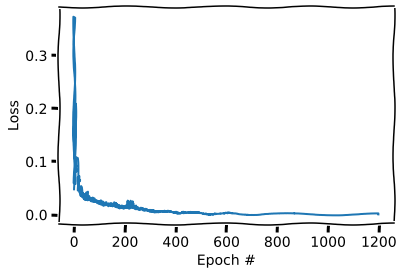

In [31]:
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses);
plt.show();

## 再次进行评估

In [32]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('准确率: %.4f %%' % (100 * correct / total))

准确率: 92.0000 %


In [33]:
%%time
#修改学习率和批次
cnn.train()
LEARNING_RATE=LEARNING_RATE / 10
TOTAL_EPOCHS=50
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)
losses = [];
for epoch in range(TOTAL_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.float().to(DEVICE)
        labels = labels.to(DEVICE)
        #清零
        optimizer.zero_grad()
        outputs = cnn(images)
        #计算损失函数
        #损失函数直接放到CPU中，因为还有其他的计算
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().data.item());
        if (i+1) % 10 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.6f'%(epoch+1, TOTAL_EPOCHS, i+1, len(train_dataset)//BATCH_SIZE, loss.data.item()))
            

Epoch : 1/50, Iter : 10/14,  Loss: 0.000482
Epoch : 2/50, Iter : 10/14,  Loss: 0.000348
Epoch : 3/50, Iter : 10/14,  Loss: 0.000239
Epoch : 4/50, Iter : 10/14,  Loss: 0.000244
Epoch : 5/50, Iter : 10/14,  Loss: 0.000239
Epoch : 6/50, Iter : 10/14,  Loss: 0.000202
Epoch : 7/50, Iter : 10/14,  Loss: 0.000222
Epoch : 8/50, Iter : 10/14,  Loss: 0.000230
Epoch : 9/50, Iter : 10/14,  Loss: 0.000199
Epoch : 10/50, Iter : 10/14,  Loss: 0.000203
Epoch : 11/50, Iter : 10/14,  Loss: 0.000182
Epoch : 12/50, Iter : 10/14,  Loss: 0.000196
Epoch : 13/50, Iter : 10/14,  Loss: 0.000178
Epoch : 14/50, Iter : 10/14,  Loss: 0.000187
Epoch : 15/50, Iter : 10/14,  Loss: 0.000167
Epoch : 16/50, Iter : 10/14,  Loss: 0.000148
Epoch : 17/50, Iter : 10/14,  Loss: 0.000154
Epoch : 18/50, Iter : 10/14,  Loss: 0.000146
Epoch : 19/50, Iter : 10/14,  Loss: 0.000132
Epoch : 20/50, Iter : 10/14,  Loss: 0.000130
Epoch : 21/50, Iter : 10/14,  Loss: 0.000129
Epoch : 22/50, Iter : 10/14,  Loss: 0.000112
Epoch : 23/50, Iter

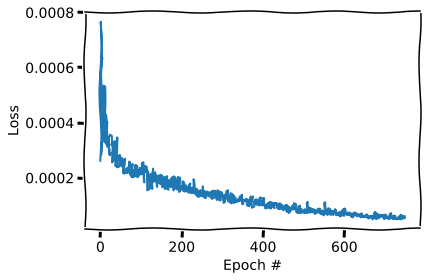

In [34]:
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses);
plt.show();

In [35]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('准确率: %.4f %%' % (100 * correct / total))

准确率: 92.0000 %


损失小了，但是准确率没有提高，这就说明已经接近模型的瓶颈了，如果再要进行优化，就需要修改模型了。另外还有一个判断模型是否到瓶颈的标准，就是看损失函数，最后一次的训练的损失函数明显的没有下降的趋势，只是在震荡，这说明已经没有什么优化的空间了。

通过简单的操作，我们也能够看到Adam优化器的暴力性，我们只要简单的修改学习率就能够达到优化的效果，Adam优化器的使用一般情况下是首先使用0.1进行预热，然后再用0.01进行大批次的训练，最后使用0.001这个学习率进行收尾，再小的学习率一般情况就不需要了。

## 总结
最后我们再总结一下几个超参数:

`BATCH_SIZE`: 批次数量，定义每次训练时多少数据作为一批，这个批次需要在dataloader初始化时进行设置，并且需要这对模型和显存进行配置，如果出现OOM有线减小，一般设为2的倍数

`DEVICE`：进行计算的设备，主要是CPU还是GPU

`LEARNING_RATE`：学习率，反向传播时使用

`TOTAL_EPOCHS`：训练的批次，一般情况下会根据损失和准确率等阈值

其实优化器和损失函数也算超参数，这里就不说了

In [36]:
%%time
#修改学习率和批次
cnn.train()
LEARNING_RATE=LEARNING_RATE / 10
TOTAL_EPOCHS=50
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)
losses = [];
for epoch in range(TOTAL_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.float().to(DEVICE)
        labels = labels.to(DEVICE)
        #清零
        optimizer.zero_grad()
        outputs = cnn(images)
        #计算损失函数
        #损失函数直接放到CPU中，因为还有其他的计算
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().data.item());
        if (i+1) % 10 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.6f'%(epoch+1, TOTAL_EPOCHS, i+1, len(train_dataset)//BATCH_SIZE, loss.data.item()))
            

Epoch : 1/50, Iter : 10/14,  Loss: 0.000050
Epoch : 2/50, Iter : 10/14,  Loss: 0.000050
Epoch : 3/50, Iter : 10/14,  Loss: 0.000049
Epoch : 4/50, Iter : 10/14,  Loss: 0.000045
Epoch : 5/50, Iter : 10/14,  Loss: 0.000048
Epoch : 6/50, Iter : 10/14,  Loss: 0.000046
Epoch : 7/50, Iter : 10/14,  Loss: 0.000047
Epoch : 8/50, Iter : 10/14,  Loss: 0.000045
Epoch : 9/50, Iter : 10/14,  Loss: 0.000044
Epoch : 10/50, Iter : 10/14,  Loss: 0.000045
Epoch : 11/50, Iter : 10/14,  Loss: 0.000045
Epoch : 12/50, Iter : 10/14,  Loss: 0.000046
Epoch : 13/50, Iter : 10/14,  Loss: 0.000044
Epoch : 14/50, Iter : 10/14,  Loss: 0.000047
Epoch : 15/50, Iter : 10/14,  Loss: 0.000044
Epoch : 16/50, Iter : 10/14,  Loss: 0.000045
Epoch : 17/50, Iter : 10/14,  Loss: 0.000052
Epoch : 18/50, Iter : 10/14,  Loss: 0.000040
Epoch : 19/50, Iter : 10/14,  Loss: 0.000040
Epoch : 20/50, Iter : 10/14,  Loss: 0.000041
Epoch : 21/50, Iter : 10/14,  Loss: 0.000047
Epoch : 22/50, Iter : 10/14,  Loss: 0.000041
Epoch : 23/50, Iter

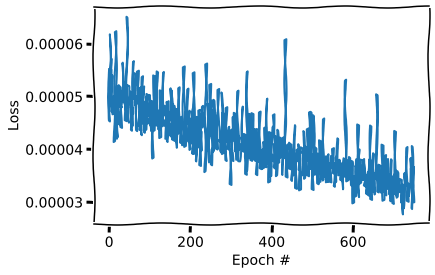

In [37]:
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses);
plt.show();

In [39]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('准确率: %.6f %%' % (100.0 * correct / total))

准确率: 92.080002 %
